<a href="https://colab.research.google.com/github/GabrielGriseli/-LP3-2016-IMC/blob/master/1/2_distancia_de_edicao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Distância de Edição (edit distance)

* Forma de quantificar a similaridade entre duas sequências de caracteres (strings)
* A distância **mínima** de edição é o menos número de operações necessárias pra transformar uma string em outra.
* Útil para tarefas como:
  * Correção ortográfica
  * Resolução de correferência
  * Identificação de variantes linguísticas e/ou ortográficas
  * Identificação de cognatos

## Como calcular

* Distância de Hamming
* Distância de Jaro
* **Distância de Levenshtein**
  * Três operações: inserção, remoção e substituição

## Distância de Levenshtein

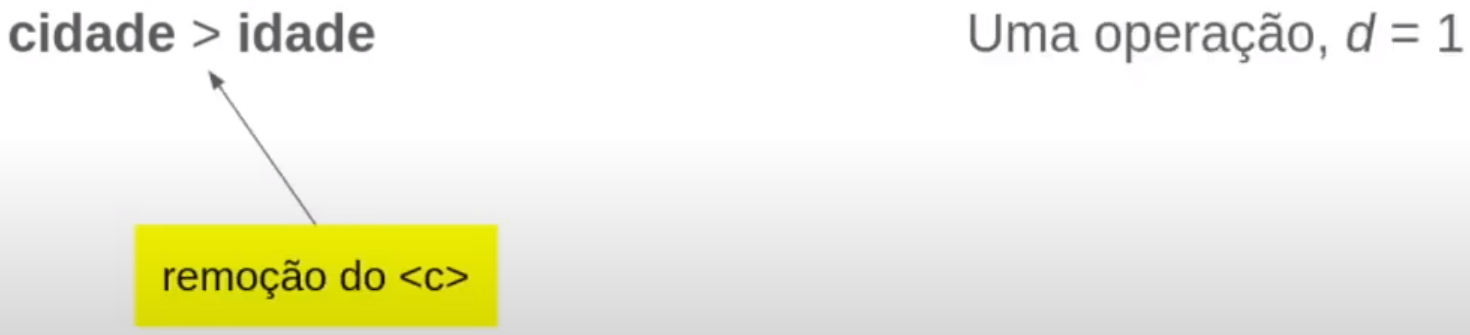

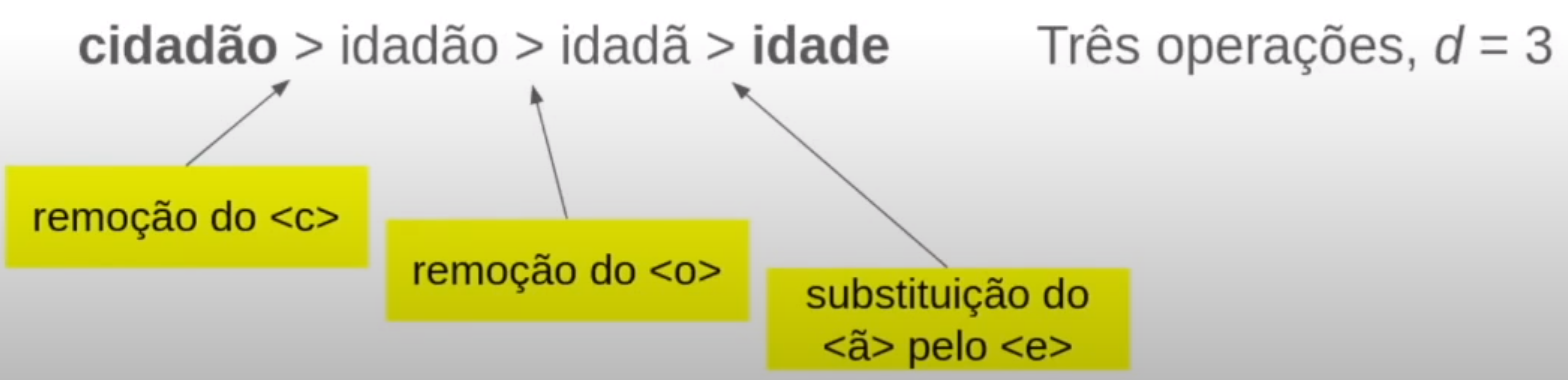

### *Bello* > *Belo*

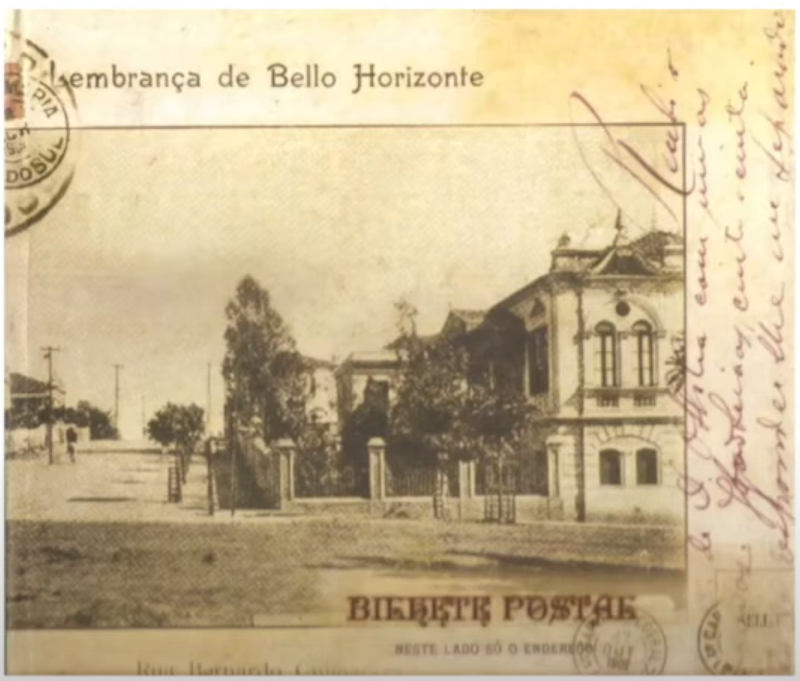

A distância mínima de edição entre a grafia antiga *Bello Horizonte* e a grafia moderna *Belo Horizonte* é pequena: basta remover uma letra

#### Bello > Belo em Python

In [ ]:
import editdistance

a = "Bello Horizonte"
b = "Belo Horizonte"

distancia = editdistance.eval(a, b)

print("A Distância de Levenshtein entre", a, "e", b, "é igual a", distancia)

A Distância de Levenshtein entre Bello Horizonte e Belo Horizonte é igual a 1


* Em Python, a biblioteca "editdistance" é utilizada para calcular distâncias de edição

In [ ]:
from nltk.metrics import *

a = "Bello Horizonte"
b =  "Belo Horizonte"

distancia = edit_distance(a, b)

print("A Distância de Levenshtein entre", a, "e", b, "é igual a", distancia)

A Distância de Levenshtein entre Bello Horizonte e Belo Horizonte é igual a 1


* A função edit_distance do NLTK também pode ser usada

### *Geraes* > *Gerais*

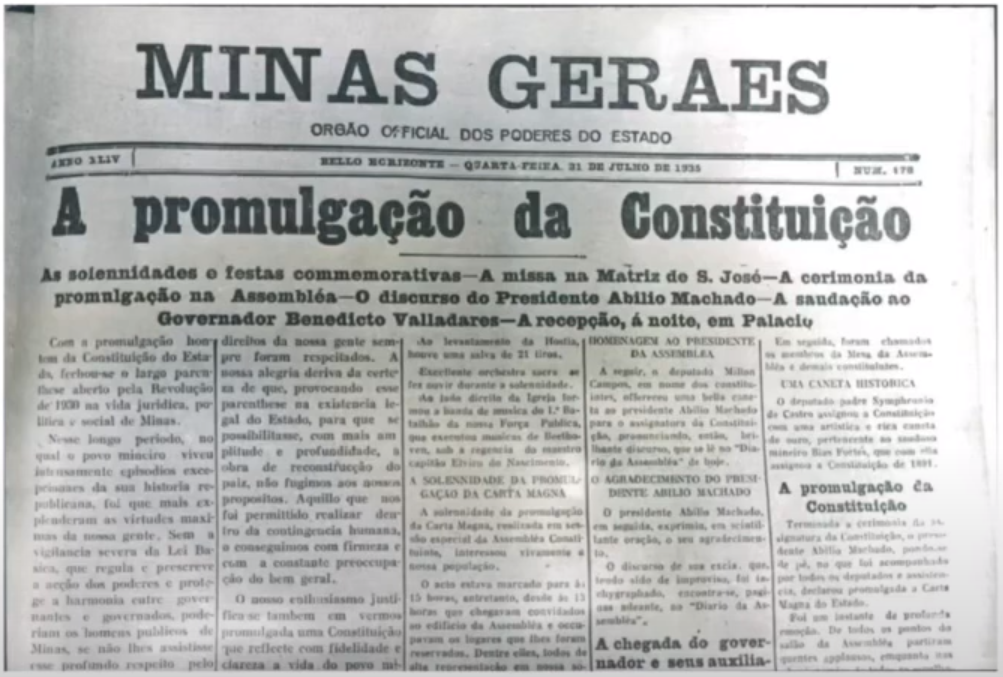

A distância mínima de edição entre a grafia antiga *Minas Geraes* e a grafia moderna *Minas Gerais* também é pequena, mas exige uma substituição

#### *Geraes* > *Gerais* em Python

In [ ]:
from nltk.metrics import *

a = "Minas Geraes"
b = "Minas Gerais"

distancia = edit_distance(a, b)

print("A Distância de Levenshtein entre", a, "e", b, "é igual a", distancia)

A Distância de Levenshtein entre Minas Geraes e Minas Gerais é igual a 1


* A substituição pode ter peso 1...

In [ ]:
from nltk.metrics import *

a = "Minas Geraes"
b = "Minas Gerais"

distancia = edit_distance(a, b, substitution_cost=2)

print("A Distância de Levenshtein entre", a, "e", b, "é igual a", distancia)

A Distância de Levenshtein entre Minas Geraes e Minas Gerais é igual a 2


* ...ou um peso diferente (no caso, 2)
* [https://www.nltk.org/api/nltk.metrics.html](https://www.nltk.org/api/nltk.metrics.html)

### Algoritmo

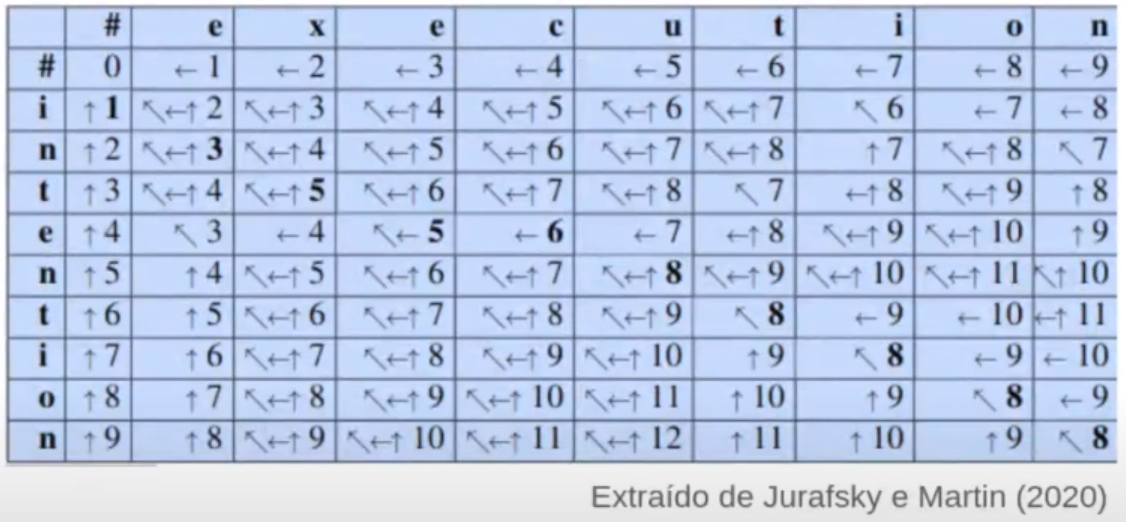

* Descrito por Wagner e Fisher (1974)
* Programação dinâmica

### Aplicações

* Correção/verificação ortográfica

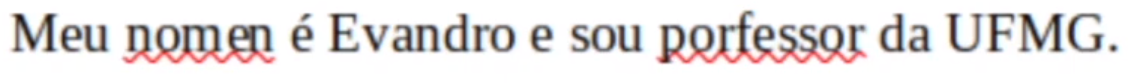

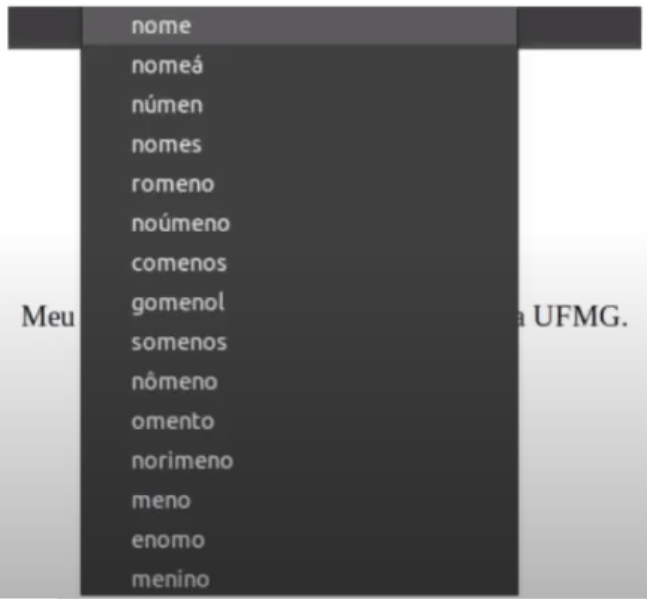

* Identificação de cognatos
  * Edit distance and dialect proximity (Nerbonne et al., 1999)
  * Evaluating linguistic distance measures (Wichmann et al., 2010)
  * ASJP World Language Tree of Lexical Similarity (Müller et al., 2010)
  * The Potential of Automatic Word Comparison for Historical Linguistics (List et al., 2017)

## Exercício 1

Neste exercício, você desenvolverá um pequeno e simples corretor ortográfico que tomará como entrada um texto e retornará uma lista de palavras ortograficamente erradas, com uma sugestão de correção para cada uma delas. Seu verificador deverá conhecer as seguintes palavras:

["O", "A", "Os", "As", "homem", "homens", "mulher", "mulheres", "é", "são", "inteligente", "inteligentes", "brilhante", "brilhantes"]

e deverá encontrar os erros ortográficos nas seguintes frases:

* O homem é inteligentr
* Os homens sõ brilhantess
* As muleres são brilantes
* A milher é inteliggente

Por fim, identifique as limitações deste corretor.



In [12]:
from nltk.metrics import edit_distance

palavras = ["O", "A", "Os", "As", "homem", "homens", "mulher", "mulheres", "é", "são", "inteligente", "inteligentes", "brilhante", "brilhantes"]

def corretor_ortografico(texto):
  tokens = texto.split()
  token_palavra = []          # token incorreto e melhor sugestão de correção

  for token in tokens:
    if token not in palavras:
      menor_dis = edit_distance(token, palavras[0])     # menor distância de Levenshtein
      palavra_cor = palavras[0]                         # sugestão de correção dada a menor distância no momento

      for palavra in palavras[1:]:
        dis = edit_distance(token, palavra)
        if dis < menor_dis:
          menor_dis = dis
          palavra_cor = palavra

      token_palavra.append((token, palavra_cor))

  return token_palavra

print(corretor_ortografico("O homem é inteligentr"))
print(corretor_ortografico("Os homens sõ brilhantess"))
print(corretor_ortografico("As muleres são brilantes"))
print(corretor_ortografico("A milher é inteliggente"))

[('inteligentr', 'inteligente')]
[('sõ', 'O'), ('brilhantess', 'brilhantes')]
[('muleres', 'mulheres'), ('brilantes', 'brilhantes')]
[('milher', 'mulher'), ('inteliggente', 'inteligente')]


## Exercício 2

Elabore um programa capaz de pré-avaliar a possibilidade de haver cognatos (isto é, palavras etimologicamente relacionadas) em listas de vocabulários de líguas diferentes. Use como entrada as seguintes listas de vocabulário provenientes da base de dados ASJP ([https://asjp.clld.org/](https://asjp.clld.org/)):

* Português: ["kabelu", "kabesa", "oreLa", "oLu", "nariS", "boka"]
* Espanhol: ["kabeSo", "kabe8a", "orexa", "oxo", "nari8", "boka"]
* Italiano: ["kapello", "testa", "orekkyo", "okkyo", "nazo", "bokka"]
* Russo: ["voL3s3", "g3Lava", "ux3", "gLas", "nos", "rot"]

Calcule a distância de edição média entre cada par de línguas e, a partir daí, encontre quais delas são filogeneticamente mais próximas.

In [24]:
from nltk.metrics import edit_distance

languages = {
  "pt": ["kabelu", "kabesa", "oreLa", "oLu", "nariS", "boka"],
  "es": ["kabeSo", "kabe8a", "orexa", "oxo", "nari8", "boka"],
  "it": ["kapello", "testa", "orekkyo", "okkyo", "nazo", "bokka"],
  "ru": ["voL3s3", "g3Lava", "ux3", "gLas", "nos", "rot"]
}

avgs = {
  "pt": [],
  "es": [],
  "it": [],
  "ru": []
}

for l1 in languages:
  for l2 in languages:
    if (l1 != l2):
      l1_l2 = 0
      for i in range(6):
        l1_l2 += edit_distance(languages[l1][i], languages[l2][i])
      avgs[l1].append((l2, l1_l2 / 6))

for language in avgs:
  min_tup = min(avgs[language], key=lambda tup: tup[1])
  print(f"A lingua filogeneticamente mais próxima de {language} é {min_tup[0]} (avg: {min_tup[1]})")

A lingua filogeneticamente mais próxima de pt é es (avg: 1.1666666666666667)
A lingua filogeneticamente mais próxima de es é pt (avg: 1.1666666666666667)
A lingua filogeneticamente mais próxima de it é pt (avg: 3.1666666666666665)
A lingua filogeneticamente mais próxima de ru é pt (avg: 4.333333333333333)


## Sumário

Conteúdo da Aula:

* Distância de edição
* Distância mínima de edição/Distância de Levenshtein
* Aplicações